In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from numpy import absolute
from libpysal.weights.contiguity import Queen
import libpysal
from statsmodels.api import OLS
sns.set_style('white')

In [66]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [67]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [68]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [69]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [70]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/LogTransformation/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [71]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'Chl-a']
MergedData [list].describe()

,2BDA,3BDA,NDCI,Chl-a
count,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,-0.005038,10.526351
std,0.132150,0.191915,0.054806,18.258538
min,0.406412,-0.183174,-0.113502,0.050000
25%,0.916918,-0.093031,-0.042380,1.900000
50%,0.966684,-0.035932,-0.016578,3.900000
75%,1.048701,0.067505,0.023032,9.992000
max,2.165665,2.150818,0.368135,166.300000


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


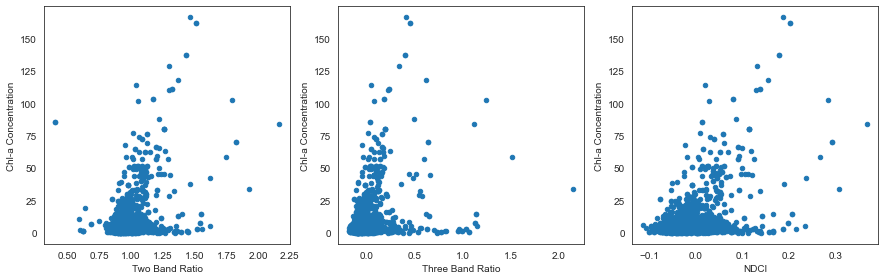

0.4000614611071748 0.28917515561718177 0.44219761482571174


In [72]:
# Scatterplot for Chl-a vs all variables

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['2BDA','Chl-a']].plot.scatter('2BDA','Chl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Chl-a Concentration')
r1 = np.corrcoef(MergedData['2BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['3BDA','Chl-a']].plot.scatter('3BDA','Chl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Chl-a Concentration')
r2 = np.corrcoef(MergedData['3BDA'].values, MergedData['Chl-a'].values)[0,1]

MergedData[['NDCI','Chl-a']].plot.scatter('NDCI','Chl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Chl-a Concentration')
r3 = np.corrcoef(MergedData['NDCI'].values, MergedData['Chl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [73]:
# Return the natural logarithm of Chl-a (Y), 2BDA, 3BDA, NDCI
MergedData['LnChl-a']=np.log(MergedData['Chl-a'])
MergedData['Ln2BDA']=np.log(MergedData['2BDA'])
MergedData['Ln3BDA']=np.log(MergedData['3BDA'])
MergedData['LnNDCI']=np.log(MergedData['NDCI'])
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B9          X          Y  \
0     0.012669  0.0080

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


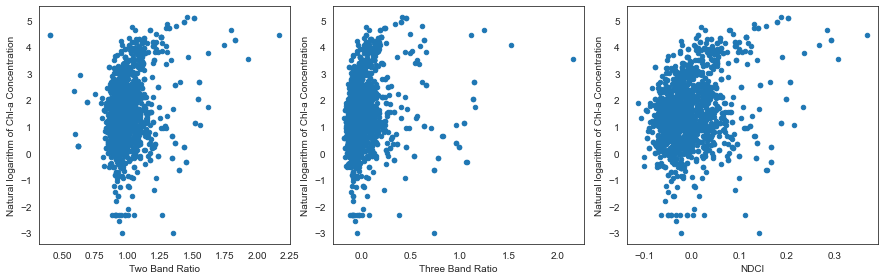

0.26047067970293347 0.18344928162498023 0.2959374649473165


In [74]:
# Scatterplot for Chl-a vs all variables

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['2BDA','LnChl-a']].plot.scatter('2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData['2BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['3BDA','LnChl-a']].plot.scatter('3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData['3BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['NDCI','LnChl-a']].plot.scatter('NDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData['NDCI'].values, MergedData['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

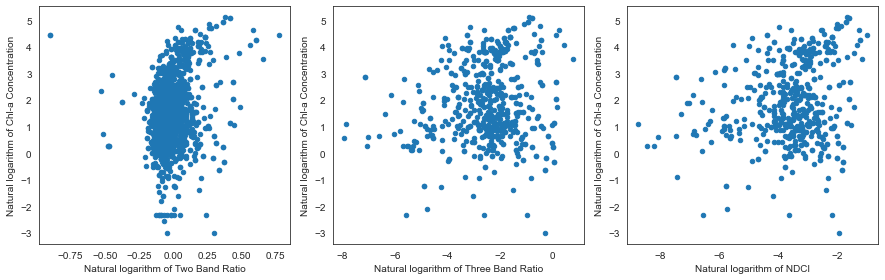

0.24616481209420393 nan nan


In [75]:
f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData[['Ln2BDA','LnChl-a']].plot.scatter('Ln2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Natural logarithm of Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData['Ln2BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['Ln3BDA','LnChl-a']].plot.scatter('Ln3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Natural logarithm of Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData['Ln3BDA'].values, MergedData['LnChl-a'].values)[0,1]

MergedData[['LnNDCI','LnChl-a']].plot.scatter('LnNDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('Natural logarithm of NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData['LnNDCI'].values, MergedData['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [76]:
# Descriptive statistics of all variables (logTransformation Chl-a)
list = ['2BDA', '3BDA', 'NDCI', 'LnChl-a']
MergedData [list].describe()

,2BDA,3BDA,NDCI,LnChl-a
count,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.995474,0.015297,-0.005038,1.502210
std,0.132150,0.191915,0.054806,1.279814
min,0.406412,-0.183174,-0.113502,-2.995732
25%,0.916918,-0.093031,-0.042380,0.641854
50%,0.966684,-0.035932,-0.016578,1.360977
75%,1.048701,0.067505,0.023032,2.301784
max,2.165665,2.150818,0.368135,5.113793


In [77]:
# Pearson Coefficient (logTransformation Chl-a)
MergedData[['2BDA', '3BDA', 'NDCI', 'LnChl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,LnChl-a
2BDA,1.000000,0.901674,0.947186,0.260471
3BDA,0.901674,1.000000,0.912430,0.183449
NDCI,0.947186,0.912430,1.000000,0.295937
LnChl-a,0.260471,0.183449,0.295937,1.000000


In [78]:
# Getting column names (logTransformation Chl-a)
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData["LnChl-a"]

In [79]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI) for (logTransformation Chl-a)
# Extract independent variables (predictors) 
X = MergedData[X_columns]

# Extract dependent variable (prediction)
Y = MergedData['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.633
Method:                 Least Squares   F-statistic:                              857.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):                   2.96e-323
Time:                        10:45:24   Log-Likelihood:                         -2373.2
No. Observations:                1487   AIC:                                      4752.
Df Residuals:                    1484   BIC:                                      4768.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
X = MergedData[X_columns]
Y = MergedData['LnChl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData['Yhat1'] = results.predict(X)
print('predicted Y:', MergedData['Yhat1'])
print('original Y:', Y)

predicted Y: 0       1.368234
1       1.368234
2       1.478407
3       1.478407
4       1.512173
          ...   
1482    1.666441
1483    1.568718
1484    1.355969
1485    1.079120
1486    1.884010
Name: Yhat1, Length: 1487, dtype: float64
original Y: 0       2.091864
1       2.091864
2      -0.356675
3      -0.356675
4       1.386294
          ...   
1482   -1.238564
1483    1.049422
1484    1.996332
1485    1.242424
1486    1.167516
Name: LnChl-a, Length: 1487, dtype: float64


In [81]:
mae = metrics.mean_absolute_error(Y, MergedData['Yhat1'])
print("MAE:",mae)

MAE: 0.9624833838625177


In [115]:
# MergedData: Threshold Chl-a=2
MergedData2 = MergedData.loc[(MergedData["LnChl-a"] > 0.30103)]
MergedData2.shape

(1270, 29)

In [116]:
# Descriptive statistics of all variables: Threshold Chl-a=2
list = ['2BDA', '3BDA', 'NDCI', 'LnChl-a']
MergedData2 [list].describe()

,2BDA,3BDA,NDCI,LnChl-a
count,1270.000000,1270.000000,1270.000000,1270.000000
mean,0.998089,0.015509,-0.004027,1.816260
std,0.132449,0.186740,0.055060,1.073750
min,0.406412,-0.183174,-0.113502,0.302472
25%,0.917081,-0.091724,-0.041783,0.946238
50%,0.971714,-0.032938,-0.014468,1.606031
75%,1.054672,0.071255,0.025499,2.483189
max,2.165665,2.150818,0.368135,5.113793


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


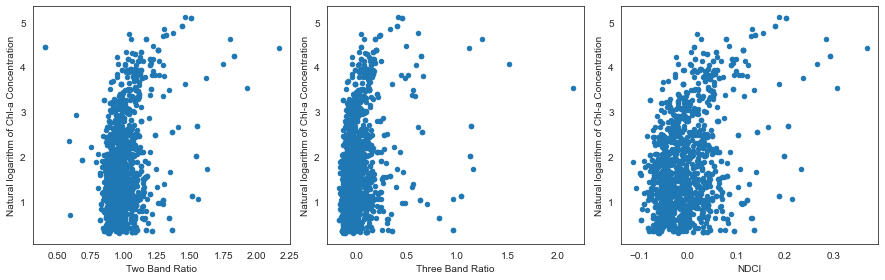

0.3323064075694879 0.3290543440114825 0.37810312468145296


In [117]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=2

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData2[['2BDA','LnChl-a']].plot.scatter('2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData2['2BDA'].values, MergedData2['LnChl-a'].values)[0,1]

MergedData2[['3BDA','LnChl-a']].plot.scatter('3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData2['3BDA'].values, MergedData2['Chl-a'].values)[0,1]

MergedData2[['NDCI','LnChl-a']].plot.scatter('NDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData2['NDCI'].values, MergedData2['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [118]:
# Pearson Coefficient 
MergedData2[['2BDA', '3BDA', 'NDCI', 'LnChl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,LnChl-a
2BDA,1.000000,0.905019,0.953742,0.332306
3BDA,0.905019,1.000000,0.910328,0.264102
NDCI,0.953742,0.910328,1.000000,0.378103
LnChl-a,0.332306,0.264102,0.378103,1.000000


In [119]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData2["LnChl-a"]

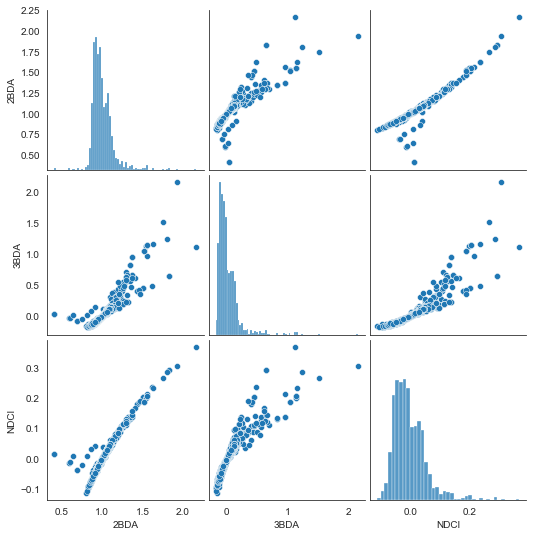

In [120]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData2[X_columns])

In [121]:
?variance_inflation_factor

In [122]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,6.0,3BDA
2,6.0,NDCI


In [123]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)/Threshold = 2
# Extract independent variables (predictors) 
X = MergedData2[X_columns]

# Extract dependent variable (prediction)
Y = MergedData2['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1545.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                        0.00
Time:                        17:21:57   Log-Likelihood:                         -1773.2
No. Observations:                1270   AIC:                                      3552.
Df Residuals:                    1267   BIC:                                      3568.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [124]:
X = MergedData2[X_columns]
Y = MergedData2['LnChl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData2['Yhat'] = results.predict(X)
print('predicted Y:', MergedData2['Yhat'])
print('original Y:', Y)

predicted Y: 0       1.661465
1       1.661465
4       1.792832
5       1.792832
6       1.774539
          ...   
1480    2.240060
1483    1.844736
1484    1.649245
1485    1.399243
1486    2.147091
Name: Yhat, Length: 1270, dtype: float64
original Y: 0       2.091864
1       2.091864
4       1.386294
5       1.386294
6       0.405465
          ...   
1480    3.559340
1483    1.049422
1484    1.996332
1485    1.242424
1486    1.167516
Name: LnChl-a, Length: 1270, dtype: float64


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
mae = metrics.mean_absolute_error(Y, MergedData2['Yhat'])
print("MAE:",mae)

MAE: 0.8203992903127421


In [93]:
# MergedData: Threshold Chl-a=5
MergedData3 = MergedData.loc[(MergedData["LnChl-a"] > 0.7)]
MergedData3.shape

(1081, 29)

In [94]:
# Descriptive statistics of all variables: Threshold Chl-a=5
list = ['2BDA', '3BDA', 'NDCI', 'LnChl-a']
MergedData3 [list].describe()

,2BDA,3BDA,NDCI,LnChl-a
count,1081.000000,1081.000000,1081.000000,1081.000000
mean,1.003216,0.021507,-0.001403,2.045493
std,0.137003,0.188929,0.056159,0.999332
min,0.406412,-0.181705,-0.113502,0.704087
25%,0.921104,-0.088934,-0.040472,1.223775
50%,0.975644,-0.026632,-0.012252,1.824549
75%,1.060064,0.075093,0.028457,2.657599
max,2.165665,2.150818,0.368135,5.113793


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


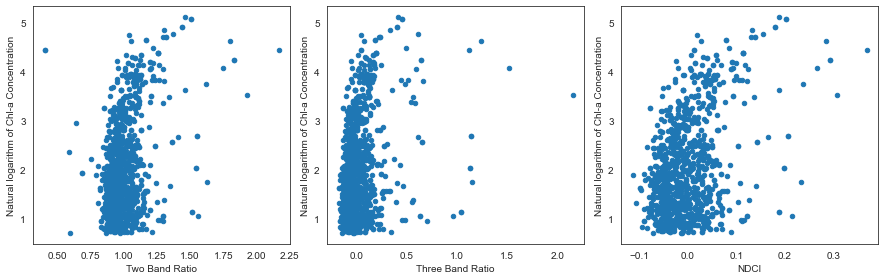

0.34731050159100146 0.34280074286538 0.3951377745556215


In [95]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=5

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData3[['2BDA','LnChl-a']].plot.scatter('2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData3['2BDA'].values, MergedData3['LnChl-a'].values)[0,1]

MergedData3[['3BDA','LnChl-a']].plot.scatter('3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData3['3BDA'].values, MergedData3['Chl-a'].values)[0,1]

MergedData3[['NDCI','LnChl-a']].plot.scatter('NDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData3['NDCI'].values, MergedData3['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [96]:
# Pearson Coefficient 
MergedData3[['2BDA', '3BDA', 'NDCI', 'LnChl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,LnChl-a
2BDA,1.000000,0.901858,0.950210,0.347311
3BDA,0.901858,1.000000,0.910504,0.280493
NDCI,0.950210,0.910504,1.000000,0.395138
LnChl-a,0.347311,0.280493,0.395138,1.000000


In [105]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)/Threshold = 5
# Extract independent variables (predictors) 
X = MergedData3[X_columns]

# Extract dependent variable (prediction)
Y = MergedData3['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              1914.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:16:29   Log-Likelihood:                         -1426.1
No. Observations:                1081   AIC:                                      2858.
Df Residuals:                    1078   BIC:                                      2873.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [106]:
X = MergedData3[X_columns]
Y = MergedData3['LnChl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData3['Yhat'] = results.predict(X)
print('predicted Y:', MergedData3['Yhat'])
print('original Y:', Y)

predicted Y: 0       1.877688
1       1.877688
4       1.999164
5       1.999164
8       1.690231
          ...   
1480    2.414377
1483    2.047216
1484    1.866403
1485    1.635555
1486    2.329358
Name: Yhat, Length: 1081, dtype: float64
original Y: 0       2.091864
1       2.091864
4       1.386294
5       1.386294
8       1.029619
          ...   
1480    3.559340
1483    1.049422
1484    1.996332
1485    1.242424
1486    1.167516
Name: LnChl-a, Length: 1081, dtype: float64


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
mae = metrics.mean_absolute_error(Y, MergedData3['Yhat'])
print("MAE:",mae)

MAE: 0.7542125965072838


In [101]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = MergedData3["LnChl-a"]

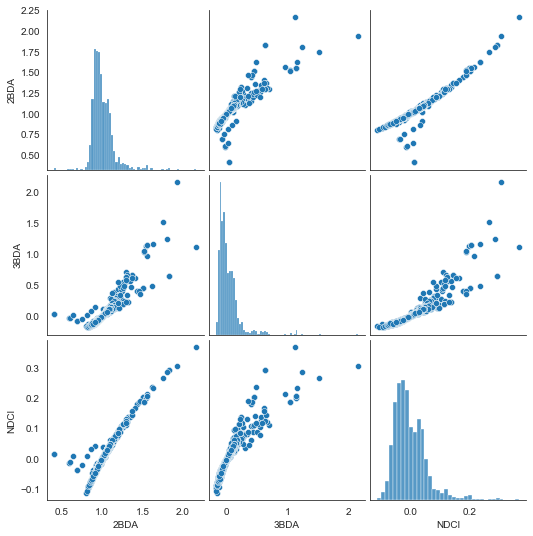

In [102]:
# Use seaborn.pairplot to plot a scatterplot matrix of independent variables (X)
sns.pairplot(MergedData3[X_columns])

In [103]:
?variance_inflation_factor

In [104]:
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,6.0,3BDA
2,6.0,NDCI


In [126]:
# MergedData: Threshold Chl-a=8
MergedData4 = MergedData.loc[(MergedData["LnChl-a"] > 0.9031)]
MergedData4.shape

(985, 29)

In [127]:
# Descriptive statistics of all variables: Threshold Chl-a=8
list = ['2BDA', '3BDA', 'NDCI', 'LnChl-a']
MergedData4 [list].describe()

,2BDA,3BDA,NDCI,LnChl-a
count,985.000000,985.000000,985.000000,985.000000
mean,1.007633,0.026851,0.000499,2.165318
std,0.140114,0.194370,0.057232,0.966410
min,0.406412,-0.181705,-0.113502,0.904218
25%,0.922727,-0.085417,-0.038583,1.373716
50%,0.980122,-0.021366,-0.009990,1.931521
75%,1.062574,0.079432,0.029666,2.788462
max,2.165665,2.150818,0.368135,5.113793


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


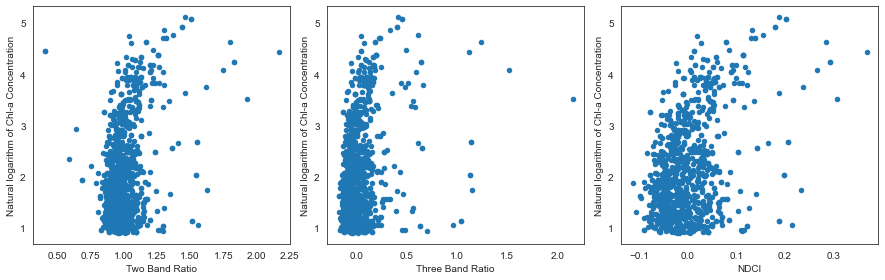

0.3410866072806363 0.3379850394259149 0.3936834429720397


In [133]:
# Scatterplot for Chl-a vs all variables:Threshold Chl-a=8

f,ax = plt.subplots(1,3, figsize=(4*3.1,4))
MergedData4[['2BDA','LnChl-a']].plot.scatter('2BDA','LnChl-a', ax=ax[0])
ax[0].set_xlabel('Two Band Ratio')
ax[0].set_ylabel('Natural logarithm of Chl-a Concentration')
r1 = np.corrcoef(MergedData4['2BDA'].values, MergedData4['LnChl-a'].values)[0,1]

MergedData4[['3BDA','LnChl-a']].plot.scatter('3BDA','LnChl-a', ax=ax[1])
ax[1].set_xlabel('Three Band Ratio')
ax[1].set_ylabel('Natural logarithm of Chl-a Concentration')
r2 = np.corrcoef(MergedData4['3BDA'].values, MergedData4['Chl-a'].values)[0,1]

MergedData4[['NDCI','LnChl-a']].plot.scatter('NDCI','LnChl-a', ax=ax[2])
ax[2].set_xlabel('NDCI')
ax[2].set_ylabel('Natural logarithm of Chl-a Concentration')
r3 = np.corrcoef(MergedData4['NDCI'].values, MergedData4['LnChl-a'].values)[0,1]

f.tight_layout()
plt.show()
print(r1,r2,r3)

In [129]:
# Pearson Coefficient 
MergedData4[['2BDA', '3BDA', 'NDCI', 'LnChl-a']].corr(method='pearson')

,2BDA,3BDA,NDCI,LnChl-a
2BDA,1.000000,0.902470,0.953435,0.341087
3BDA,0.902470,1.000000,0.907967,0.271112
NDCI,0.953435,0.907967,1.000000,0.393683
LnChl-a,0.341087,0.271112,0.393683,1.000000


In [130]:
#OLS model based on Three predictors (2BDA,3BDA,NDCI)/Threshold = 8
# Extract independent variables (predictors) 
X = MergedData4[X_columns]

# Extract dependent variable (prediction)
Y = MergedData4['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              2073.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                        0.00
Time:                        17:28:08   Log-Likelihood:                         -1266.7
No. Observations:                 985   AIC:                                      2539.
Df Residuals:                     982   BIC:                                      2554.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [131]:
X = MergedData4[X_columns]
Y = MergedData4['LnChl-a']

model = OLS(Y, X)
results = OLS(Y, X).fit()

# prediction
MergedData4['Yhat'] = results.predict(X)
print('predicted Y:', MergedData4['Yhat'])
print('original Y:', Y)

predicted Y: 0       1.991466
1       1.991466
4       2.107897
5       2.107897
8       1.813751
          ...   
1480    2.502529
1483    2.153932
1484    1.980897
1485    1.759303
1486    2.423143
Name: Yhat, Length: 985, dtype: float64
original Y: 0       2.091864
1       2.091864
4       1.386294
5       1.386294
8       1.029619
          ...   
1480    3.559340
1483    1.049422
1484    1.996332
1485    1.242424
1486    1.167516
Name: LnChl-a, Length: 985, dtype: float64


C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
mae = metrics.mean_absolute_error(Y, MergedData4['Yhat'])
print("MAE:",mae)

MAE: 0.7252208194302775


In [ ]:
# Model with 2 predicters (2BDA & 3BDA)

In [134]:
#OLS model based on two predictors (2BDA,3BDA) for (logTransformation Chl-a)
# Extract independent variables (predictors) 
X = MergedData[[ '2BDA' , '3BDA']]

# Extract dependent variable (prediction)
Y = MergedData['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.604
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              1134.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                   1.11e-299
Time:                        15:28:59   Log-Likelihood:                         -2431.3
No. Observations:                1487   AIC:                                      4867.
Df Residuals:                    1485   BIC:                                      4877.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [135]:
#OLS model based on two predictors (2BDA,3BDA) for (logTransformation Chl-a)/ threshold chl-a > 2
# Extract independent variables (predictors) 
X = MergedData2[[ '2BDA' , '3BDA']]

# Extract dependent variable (prediction)
Y = MergedData2['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              2095.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:29:46   Log-Likelihood:                         -1823.3
No. Observations:                1270   AIC:                                      3651.
Df Residuals:                    1268   BIC:                                      3661.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [136]:
#OLS model based on two predictors (2BDA,3BDA) for (logTransformation Chl-a)/ threshold chl-a > 8
# Extract independent variables (predictors) 
X = MergedData4[[ '2BDA' , '3BDA']]

# Extract dependent variable (prediction)
Y = MergedData4['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              2857.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:30:03   Log-Likelihood:                         -1303.0
No. Observations:                 985   AIC:                                      2610.
Df Residuals:                     983   BIC:                                      2620.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Model with 2 predicters (2BDA & NDCI)

In [137]:
#OLS model based on two predictors (2BDA,NDCI) for (logTransformation Chl-a)
# Extract independent variables (predictors) 
X = MergedData[[ '2BDA' , 'NDCI']]

# Extract dependent variable (prediction)
Y = MergedData['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              1175.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                   1.28e-306
Time:                        15:33:44   Log-Likelihood:                         -2415.3
No. Observations:                1487   AIC:                                      4835.
Df Residuals:                    1485   BIC:                                      4845.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [138]:
#OLS model based on two predictors (2BDA,NDCI) for (logTransformation Chl-a)/ threshold chl-a > 2
# Extract independent variables (predictors) 
X = MergedData2[[ '2BDA' , 'NDCI']]

# Extract dependent variable (prediction)
Y = MergedData2['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              2167.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:35:12   Log-Likelihood:                         -1806.7
No. Observations:                1270   AIC:                                      3617.
Df Residuals:                    1268   BIC:                                      3628.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [139]:
#OLS model based on two predictors (2BDA,NDCI) for (logTransformation Chl-a)/ threshold chl-a > 8
# Extract independent variables (predictors) 
X = MergedData4[[ '2BDA' , 'NDCI']]

# Extract dependent variable (prediction)
Y = MergedData4['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              2893.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        15:35:17   Log-Likelihood:                         -1297.8
No. Observations:                 985   AIC:                                      2600.
Df Residuals:                     983   BIC:                                      2609.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Model with 2 predicters (3BDA & NDCI) ---- very bad ----

In [140]:
#OLS model based on two predictors (3BDA,NDCI) for (logTransformation Chl-a)
# Extract independent variables (predictors) 
X = MergedData[[ '3BDA' , 'NDCI']]

# Extract dependent variable (prediction)
Y = MergedData['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              31.08
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    5.99e-14
Time:                        16:03:11   Log-Likelihood:                         -3090.1
No. Observations:                1487   AIC:                                      6184.
Df Residuals:                    1485   BIC:                                      6195.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [141]:
#OLS model based on two predictors (3BDA,NDCI) for (logTransformation Chl-a)/ threshold chl-a > 2
# Extract independent variables (predictors) 
X = MergedData2[[ '3BDA' , 'NDCI']]

# Extract dependent variable (prediction)
Y = MergedData2['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              39.08
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    3.40e-17
Time:                        16:03:17   Log-Likelihood:                         -2712.2
No. Observations:                1270   AIC:                                      5428.
Df Residuals:                    1268   BIC:                                      5439.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [142]:
#OLS model based on two predictors (3BDA,NDCI) for (logTransformation Chl-a)/ threshold chl-a > 8
# Extract independent variables (predictors) 
X = MergedData4[[ '3BDA' , 'NDCI']]

# Extract dependent variable (prediction)
Y = MergedData4['LnChl-a']

model = OLS(Y,X)
results = OLS(Y,X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              33.97
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    5.41e-15
Time:                        16:03:23   Log-Likelihood:                         -2215.1
No. Observations:                 985   AIC:                                      4434.
Df Residuals:                     983   BIC:                                      4444.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------